In [1]:
import pandas as pd
np = pd.np
import matplotlib.pyplot as plt

In [2]:
#suffix = '15min_2019_Feb_28'
#suffix = '15min_2019_Oct_16'
#suffix = '3H_20180501_20191101'
#suffix = '1H_20180501_20200201'
# suffix = '3H_20180501_20200201'
# suffix = '6H_20180501_20200201'
# suffix = '12H_20180501_20200201'
# suffix = '1D_20180501_20200201'
# suffix = '1W_20180501_20200201'
suffix = '1M_20180501_20200201'
df = pd.read_csv('../data/kaiterra/kaiterra_fieldeggid_{}_panel.csv'.format(suffix), index_col=[0,1], parse_dates=True)

In [3]:
df.sort_index(inplace=True)
df

pm25        pm10
field_egg_id timestamp_round                                  
113E         2018-05-01 00:00:00+05:30         NaN         NaN
             2018-06-01 00:00:00+05:30   45.347418   48.842723
             2018-07-01 00:00:00+05:30   70.143665   75.734163
             2018-08-01 00:00:00+05:30   52.206313   56.358737
             2018-09-01 00:00:00+05:30   63.885804   69.044776
...                                            ...         ...
EAC8         2019-09-01 00:00:00+05:30   39.824979   47.570044
             2019-10-01 00:00:00+05:30  106.423717  135.803421
             2019-11-01 00:00:00+05:30  187.427268  265.322965
             2019-12-01 00:00:00+05:30  201.843656  304.500056
             2020-01-01 00:00:00+05:30  168.616264  242.084503

[588 rows x 2 columns]

In [4]:
locs_df = pd.read_csv('../data/kaiterra/kaiterra_locations.csv', index_col=0)

In [5]:
sensor = 'pm25'

/home/shivar/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,
/home/shivar/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,
/home/shivar/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,
/home/shivar/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,
/home/shivar/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,
/home/shivar/anacond

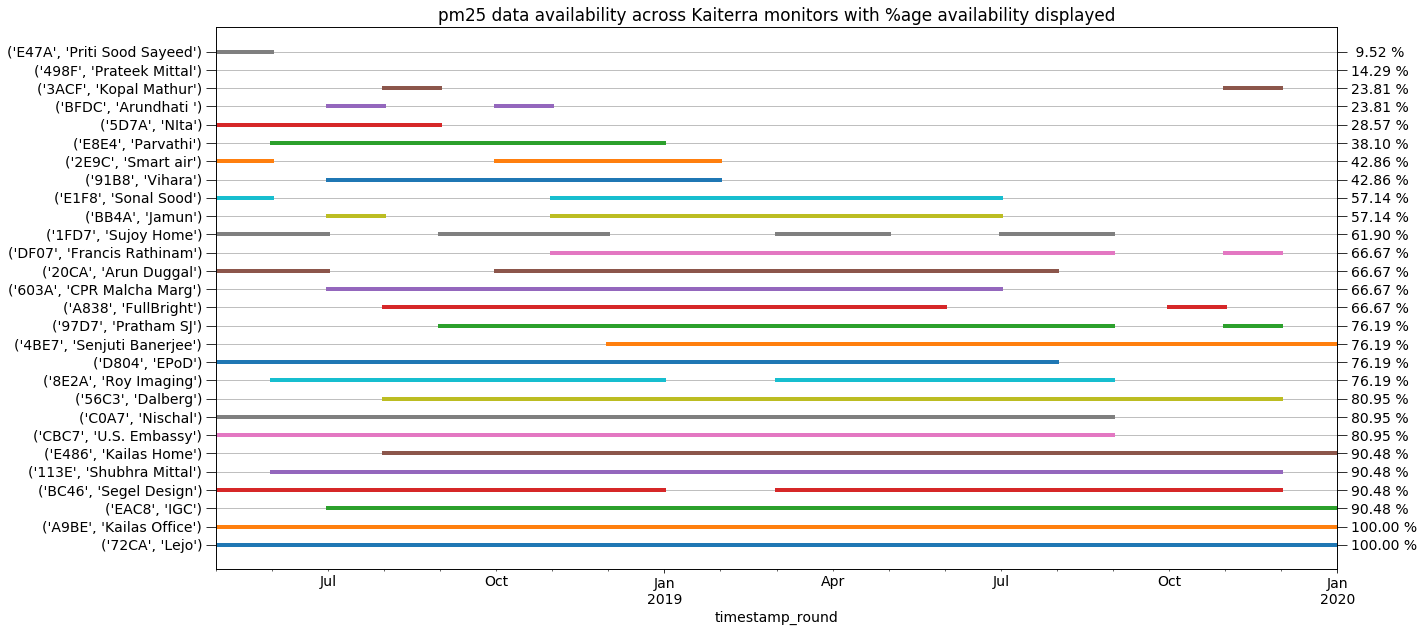

In [6]:
# display availability based on percent counts
grouped = df.groupby(level=0)
validfracs = (grouped[sensor].count() / grouped[sensor].size())
validfracs.sort_values(ascending=False, inplace=True)

plt.rc('font', size=14)

fig = plt.figure(figsize=(20,9))
ax = fig.add_subplot(111)

for count, name in enumerate(validfracs.index, 1):
    # plot the data availability
    group = grouped.get_group(name)
    group.reset_index(level=0, drop=True, inplace=True)
    group[sensor].where(np.isnan(group[sensor]), other=count).plot(lw=4)

ax.set_yticks(np.arange(1,count+1))
#ax.set_yticklabels([(name, grouped.get_group(name).location[0]) for name in validfracs.index])
ax.set_yticklabels([(name, locs_df.Location[name]) for name in validfracs.index])
ax.tick_params(axis='y', right=0, left=1, length=10)
ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks(ax.get_yticks())
ax2.set_yticklabels(['{:5.2f} %'.format(val*100) for val in validfracs])
ax2.tick_params(axis='y', right=1, left=0, length=10)
ax.set_title('{} data availability across Kaiterra monitors with %age availability displayed'.format(sensor))
ax.grid(axis='y')
fig.tight_layout()
plt.show()

In [7]:
validfracs

field_egg_id
72CA    1.000000
A9BE    1.000000
EAC8    0.904762
BC46    0.904762
113E    0.904762
E486    0.904762
CBC7    0.809524
C0A7    0.809524
56C3    0.809524
8E2A    0.761905
D804    0.761905
4BE7    0.761905
97D7    0.761905
A838    0.666667
603A    0.666667
20CA    0.666667
DF07    0.666667
1FD7    0.619048
BB4A    0.571429
E1F8    0.571429
91B8    0.428571
2E9C    0.428571
E8E4    0.380952
5D7A    0.285714
BFDC    0.238095
3ACF    0.238095
498F    0.142857
E47A    0.095238
Name: pm25, dtype: float64

In [8]:
#fig.savefig('data/datagaps_kaiterra_fieldeggs_{}_long.png'.format(suffix))
#fig.savefig('data/datagaps_kaiterra_fieldeggs_{}_long.pdf'.format(suffix))
savepath = '../figures/datagaps_{}_kaiterra_fieldeggs_{}'.format(sensor, suffix)
fig.savefig(savepath + '.png')
fig.savefig(savepath + '.pdf')
validfracs.to_csv(savepath + '.csv', float_format='%.4f', header=True)
plt.close(fig)

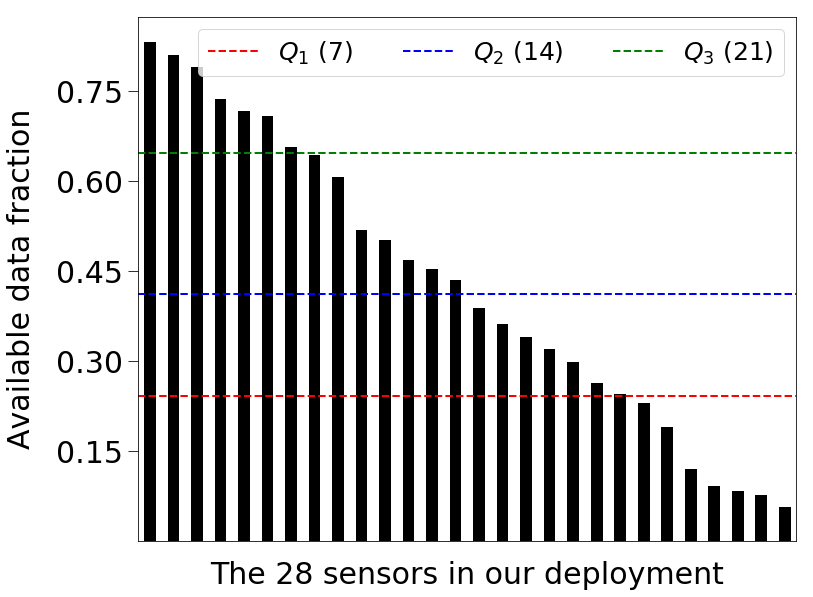

In [12]:
# display availability based on percent counts
grouped = df.groupby(level=0)
validfracs = (grouped.pm25.count() / grouped.pm25.size())
validfracs.sort_values(ascending=False, inplace=True)

pt1 = np.percentile(validfracs.values, 25)
pt2 = np.percentile(validfracs.values, 50)
pt3 = np.percentile(validfracs.values, 75)

n1 = validfracs.size // 4
n2 = 2*n1
n3 = 3*n1

plt.rc('font', size=30)
plt.rc('ps', useafm=True)
plt.rc('pdf', use14corefonts=True)

plt.figure(figsize=(12,9))
# validfracs.plot(kind='hist', bins=30)
# plt.xlim(0,1)
validfracs.plot(kind='bar', color='k', label='')
# plt.bar(validfracs.values, color='k')
xmin, xmax = plt.xlim()
plt.hlines([pt1], xmin, xmax, colors='r', linestyles='--', lw=2, label=r'$Q_1$ ({})'.format(n1))
plt.hlines([pt2], xmin, xmax, colors='b', linestyles='--', lw=2, label=r'$Q_2$ ({})'.format(n2))
plt.hlines([pt3], xmin, xmax, colors='g', linestyles='--', lw=2, label=r'$Q_3$ ({})'.format(n3))
plt.xlim(xmin, xmax)
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(6, prune='both'))
plt.tick_params(length=10, pad=5, labelbottom=0, bottom=0)
plt.xlabel('The {} sensors in our deployment'.format(validfracs.size), labelpad=20)
plt.ylabel('Available data fraction', labelpad=20)
plt.legend(ncol=3, fontsize='small')
plt.tight_layout()
#plt.savefig('data/datagaps_kaiterra_fieldeggs_2019_Feb_28_bar.eps')
plt.savefig('../figures/datagaps_kaiterra_fieldeggs_{}_bar.eps'.format(suffix))
plt.show()

In [13]:
plt.close('all')